In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info() #to check any null values, this will give count of non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()#return data frame with only non null value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True) #saves the data frame with non null values only

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1) #x is data frame without the target variable, since we are dropping a column we need to mention axis=1
y = data['median_house_value'] #y is just that one column

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #20% of the data is reserved for evaluationg, go to size of testing is 0.2.

In [10]:
train_data=x_train.join(y_train) #combined data set for training

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15273,-117.28,33.06,8.0,4172.0,1022.0,2585.0,941.0,4.0118,NEAR OCEAN,245800.0
16558,-121.28,37.83,32.0,696.0,151.0,443.0,144.0,2.5156,INLAND,86300.0
20430,-118.84,34.21,16.0,4975.0,949.0,2537.0,971.0,5.2361,<1H OCEAN,224700.0
17902,-121.99,37.37,27.0,1797.0,538.0,1610.0,531.0,4.2422,<1H OCEAN,237500.0
16379,-121.30,38.02,16.0,2717.0,621.0,3343.0,643.0,2.5473,INLAND,106300.0
...,...,...,...,...,...,...,...,...,...,...
17194,-119.79,34.45,24.0,2746.0,433.0,1076.0,380.0,5.8635,NEAR OCEAN,348700.0
3934,-118.57,34.22,27.0,2795.0,606.0,1702.0,586.0,3.7798,<1H OCEAN,258400.0
15041,-116.96,32.78,26.0,2807.0,630.0,1785.0,580.0,2.1638,<1H OCEAN,132800.0
18833,-122.56,41.69,21.0,2010.0,360.0,947.0,306.0,2.4107,INLAND,70100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

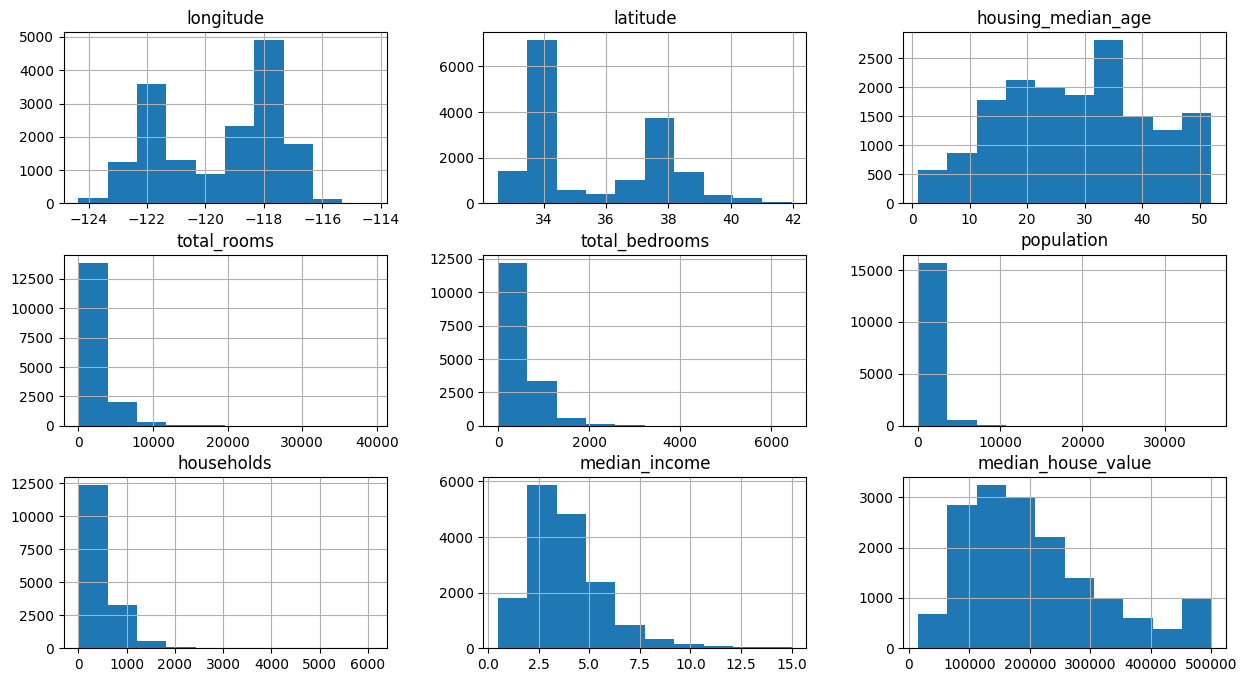

In [12]:
train_data.hist(figsize=(15,8)) #to get histograms of individual features, fig sze is to set the width and height of figures

In [13]:
train_data1 = train_data.select_dtypes(include=[np.number]) #to remove non numeric values from the columns


<Axes: >

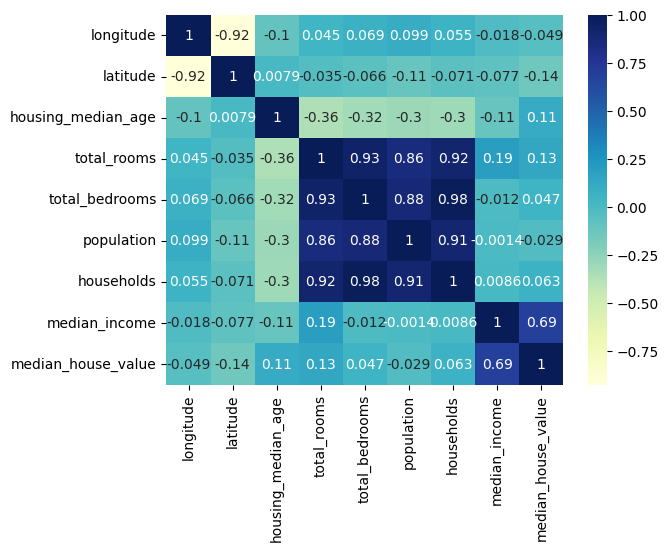

In [14]:
sns.heatmap(train_data1.corr(), annot=True, cmap="YlGnBu") #heatmap of correlations

In [15]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1) #taking log values adding 1 
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

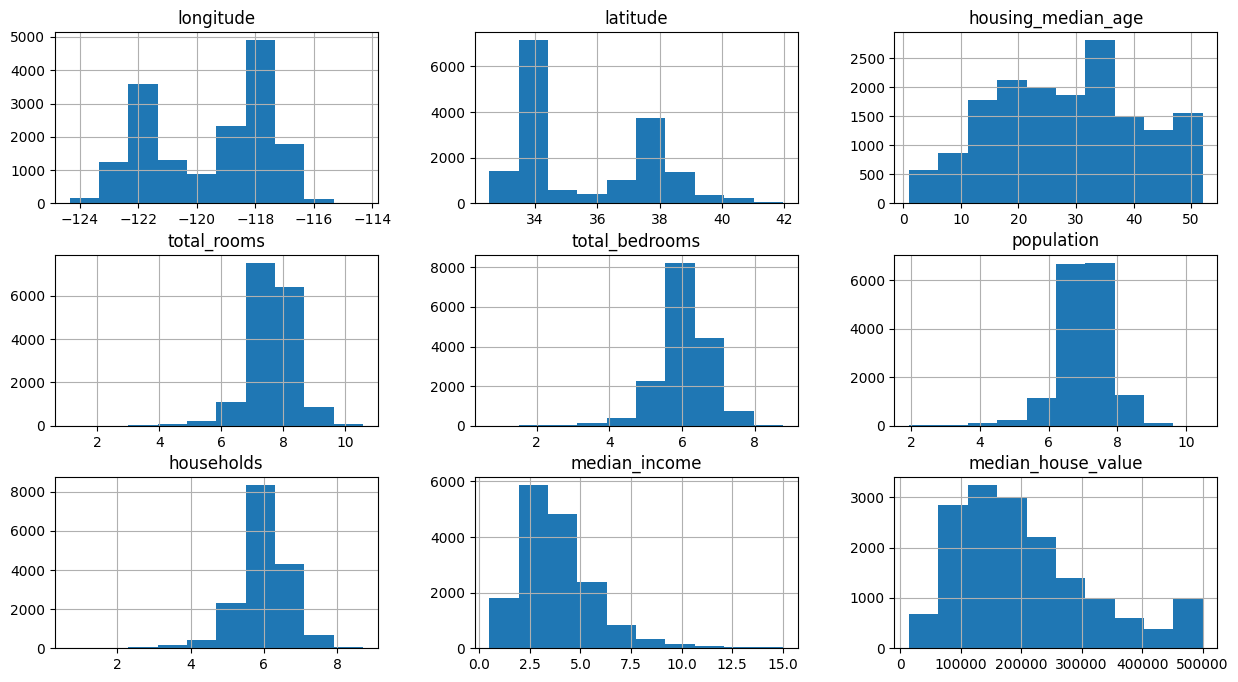

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7226
INLAND        5191
NEAR OCEAN    2115
NEAR BAY      1810
ISLAND           4
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
uniq_labels_ocean_proximity = train_data.ocean_proximity.unique()

In [20]:
uniq_labels_ocean_proximity

array(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [21]:
le.fit(uniq_labels_ocean_proximity)

LabelEncoder()

In [22]:
train_data['ocean_proximity'] = le.transform(train_data['ocean_proximity'])

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15273,-117.28,33.06,8.0,8.336390,6.930495,7.857868,6.848005,4.0118,4,245800.0
16558,-121.28,37.83,32.0,6.546785,5.023881,6.095825,4.976734,2.5156,1,86300.0
20430,-118.84,34.21,16.0,8.512382,6.856462,7.839132,6.879356,5.2361,0,224700.0
17902,-121.99,37.37,27.0,7.494430,6.289716,7.384610,6.276643,4.2422,0,237500.0
16379,-121.30,38.02,16.0,7.907652,6.432940,8.114923,6.467699,2.5473,1,106300.0
...,...,...,...,...,...,...,...,...,...,...
17194,-119.79,34.45,24.0,7.918265,6.073045,6.981935,5.942799,5.8635,4,348700.0
3934,-118.57,34.22,27.0,7.935945,6.408529,7.440147,6.375025,3.7798,0,258400.0
15041,-116.96,32.78,26.0,7.940228,6.447306,7.487734,6.364751,2.1638,0,132800.0
18833,-122.56,41.69,21.0,7.606387,5.888878,6.854355,5.726848,2.4107,1,70100.0


In [24]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

<Axes: xlabel='latitude', ylabel='longitude'>

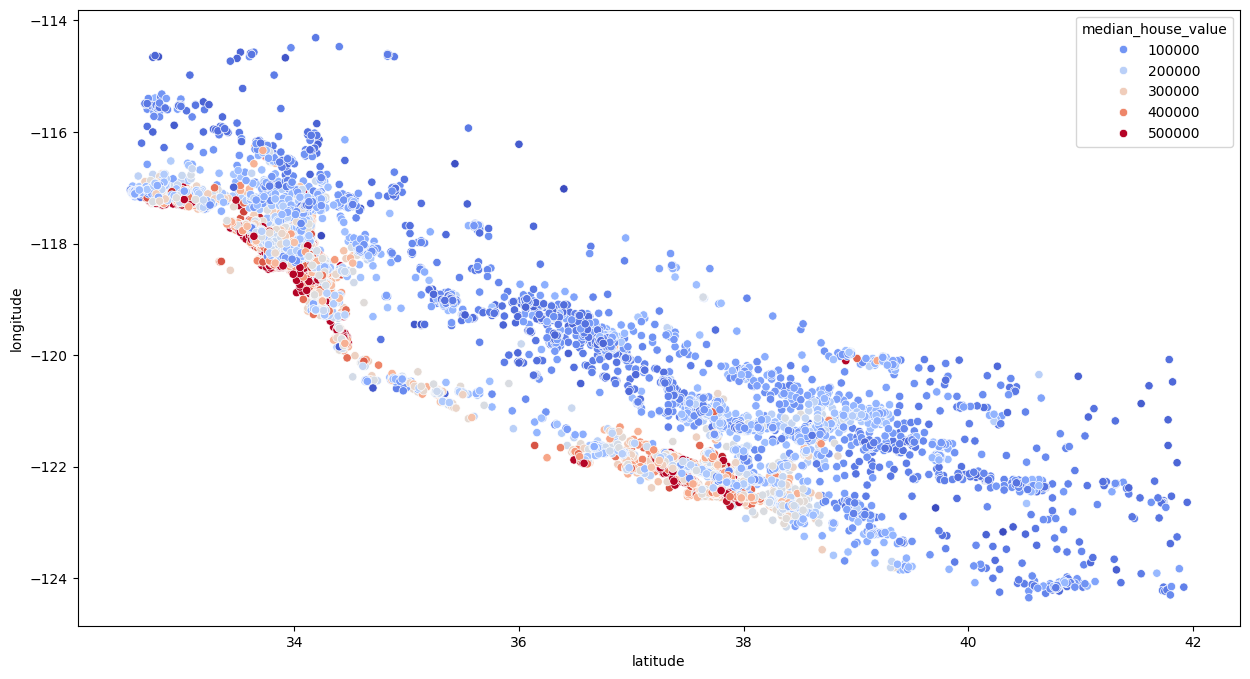

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm") #plotting median house against longitude and latitude

<Axes: >

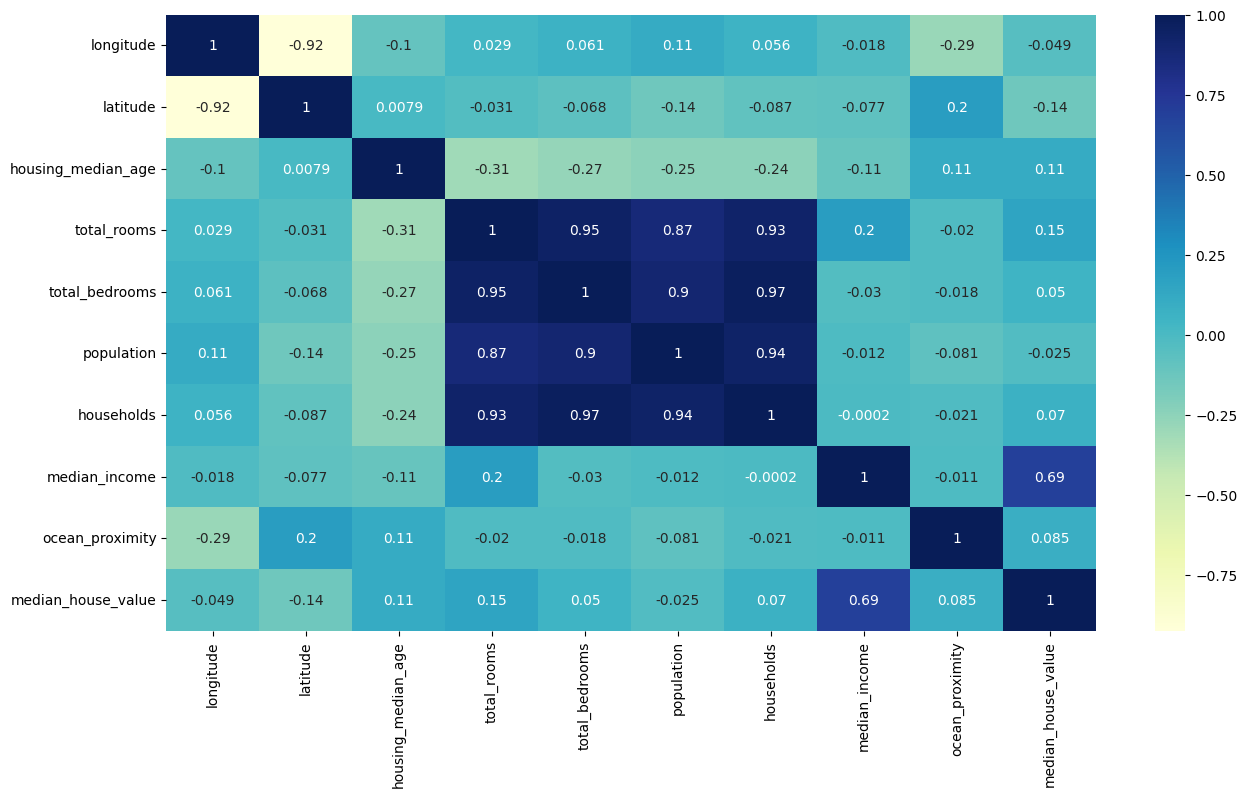

In [26]:
plt.figure(figsize=(15, 8))#defining size
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [27]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms'] #No. of bedrooms to total no. of rooms
train_data['household_rooms']=train_data['total_rooms']/train_data['households'] #No. of rooms per household

<Axes: >

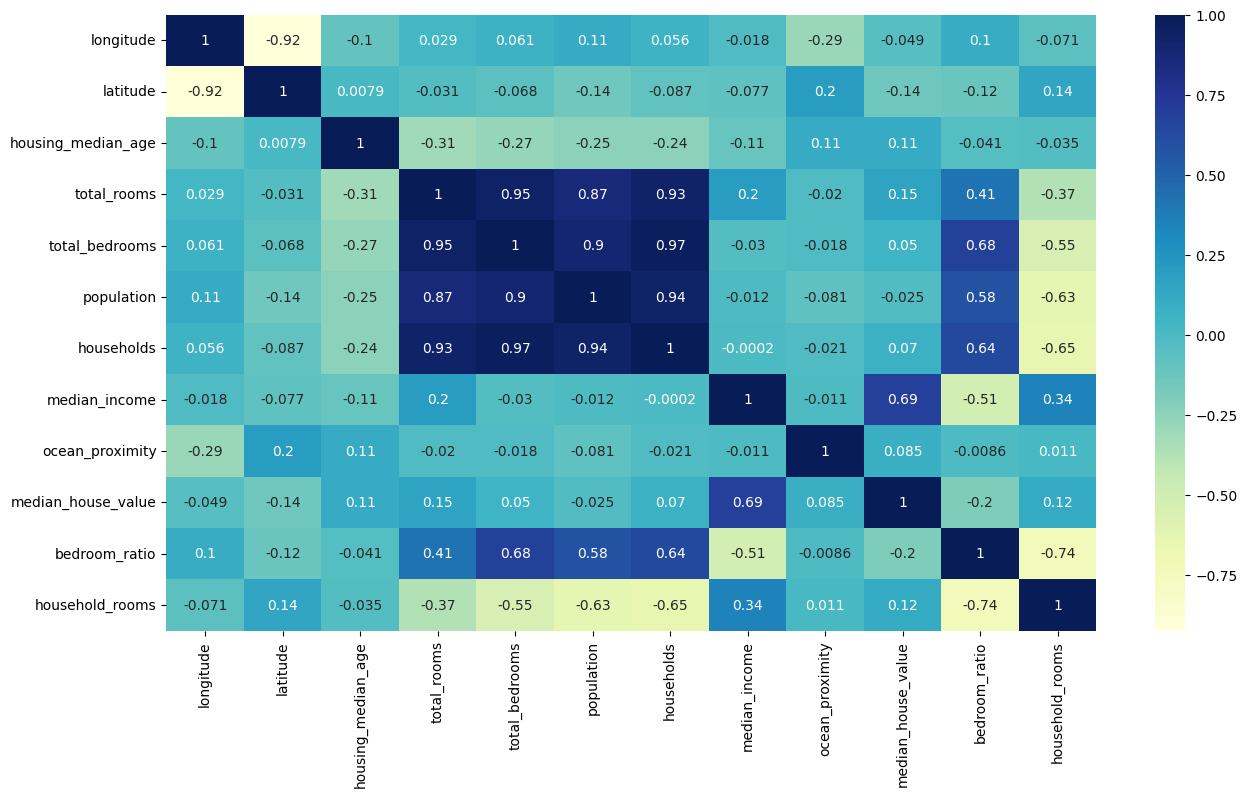

In [28]:
plt.figure(figsize=(15, 8))#defining size
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value'] #splitting the training data in x and y axis
# x_train_s, = scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
test_data = x_test.join(y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms']+1) #taking log values adding 1 
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms']+1)
test_data['population'] =np.log(test_data['population']+1)
test_data['households'] =np.log(test_data['households']+1)

In [31]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18994,-121.95,38.43,19.0,8.010360,6.313548,7.418181,6.284134,5.1534,INLAND,232800.0
17058,-122.24,37.48,40.0,8.402904,6.935370,7.640604,6.890609,3.5322,NEAR OCEAN,361900.0
8718,-118.37,33.85,29.0,8.206038,6.375025,7.394493,6.416732,6.3974,<1H OCEAN,410000.0
10803,-117.93,33.61,27.0,7.499423,6.144186,6.674561,5.883322,3.8125,<1H OCEAN,366700.0
18571,-121.76,36.92,46.0,6.854355,5.552960,7.021976,5.579730,3.4125,<1H OCEAN,160700.0
...,...,...,...,...,...,...,...,...,...,...
8678,-118.32,33.88,37.0,7.246368,5.541264,6.583409,5.529429,6.4781,<1H OCEAN,269000.0
5251,-118.46,34.08,35.0,8.085795,6.265301,6.971669,6.184149,7.8426,<1H OCEAN,500001.0
3825,-118.45,34.20,27.0,7.360740,6.111467,6.946976,6.122493,2.5562,<1H OCEAN,190500.0
19945,-119.36,36.21,18.0,6.987490,5.313206,6.677083,5.365976,2.4032,INLAND,60000.0


In [32]:
test_data['ocean_proximity'] = le.transform(test_data['ocean_proximity'])

In [33]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms'] #No. of bedrooms to total no. of rooms
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [34]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
18994,-121.95,38.43,19.0,8.010360,6.313548,7.418181,6.284134,5.1534,1,232800.0,0.788173,1.274696
17058,-122.24,37.48,40.0,8.402904,6.935370,7.640604,6.890609,3.5322,4,361900.0,0.825354,1.219472
8718,-118.37,33.85,29.0,8.206038,6.375025,7.394493,6.416732,6.3974,0,410000.0,0.776870,1.278850
10803,-117.93,33.61,27.0,7.499423,6.144186,6.674561,5.883322,3.8125,0,366700.0,0.819288,1.274692
18571,-121.76,36.92,46.0,6.854355,5.552960,7.021976,5.579730,3.4125,0,160700.0,0.810136,1.228438
...,...,...,...,...,...,...,...,...,...,...,...,...
8678,-118.32,33.88,37.0,7.246368,5.541264,6.583409,5.529429,6.4781,0,269000.0,0.764695,1.310509
5251,-118.46,34.08,35.0,8.085795,6.265301,6.971669,6.184149,7.8426,0,500001.0,0.774853,1.307503
3825,-118.45,34.20,27.0,7.360740,6.111467,6.946976,6.122493,2.5562,0,190500.0,0.830279,1.202246
19945,-119.36,36.21,18.0,6.987490,5.313206,6.677083,5.365976,2.4032,1,60000.0,0.760388,1.302184


In [35]:
test_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'bedroom_ratio',
       'household_rooms'],
      dtype='object')

In [36]:
x_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value'] #splitting the training data in x and y axis

In [37]:
reg.score(x_test,y_test) #calculates the R-squared score. The R-squared (coefficient of determination) is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.

0.6741706069939088

In [38]:
from sklearn.ensemble import RandomForestRegressor # Importing Random Forest Regressor

forest = RandomForestRegressor() #Instantiation of Baseline model

forest.fit(x_train, y_train) # Training model

RandomForestRegressor()

In [39]:
forest.score(x_train, y_train) # Evaluating the model fit

0.9735974660790443

In [40]:
from sklearn.model_selection import GridSearchCV # Automating Hyperparameter Tuning

forest = RandomForestRegressor()

# Hyperparameters
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

# Performing Cross Validation
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Training the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
best_forest = grid_search.best_estimator_ #determining the best hyperparameters using the attribute - .best_estimator_

In [42]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [43]:
best_forest.score(x_test,y_test) #Evaluating the model

0.8229487376171619